## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!

In [10]:
import pandas as pd
import numpy as np
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-02-03 04:32:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-02-03 04:32:21 (135 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [11]:
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

df = pd.read_csv('house-votes-84.data', 
                 header=None, 
                 names=column_headers,
                 na_values="?")

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
df.shape

(435, 17)

In [0]:
dic = {'y': 1, 'n': 0}

In [13]:
polit_df= df
polit_df= polit_df.replace(dic)
polit_df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# Btw the way, spent half the lecture fighting off my cats(figuratively)
# thats why I typed out the notation as well, because I gave up typing during the lecture
import scipy.stats as stats

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a simple mean for given data.
  Using two tailed distrubution and tow-tailed test, default 95% confidence.

  Arguments:
  data - iterate (list or numpy array) of sample observations
  confidence - level of confidence for the interval

  Returns:
  tuple of (mean, lower bound, upper bound)
  """
  data_array = np.array(data)
  data_mean = np.mean(data)
  n = len(data)
  stderr = np.std(data_array, ddof= 1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1 + confidence) / 2, n-1)
  return (data_mean, data_mean - moe, data_mean + moe)

In [0]:
rep= polit_df[polit_df['party'] == 'republican']
dem= polit_df[polit_df['party'] == 'democrat']

In [0]:
# Now to choose a data set

In [16]:
dem['anti-satellite-ban'].head()

2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
Name: anti-satellite-ban, dtype: float64

In [18]:
confidence_interval(dem['anti-satellite-ban'].dropna())

(0.7722007722007722, 0.7207820216365644, 0.8236195227649801)

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

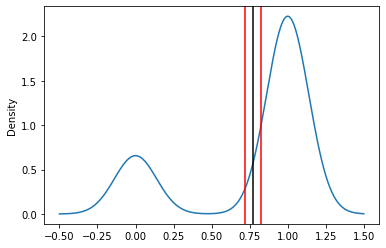

In [31]:
#I tried doing it with seaborn like he did on class but it was just a hot mess
# It was a lot easier to switch to a different library than fix it

dem['anti-satellite-ban'].plot(kind='kde')
CI = confidence_interval(dem['anti-satellite-ban'].dropna())

plt.axvline(x=CI[1], color='r')
plt.axvline(x=CI[2], color='r')
plt.axvline(x=CI[0], color='k');

In [0]:
# About 77% of Democrats appeared to supprt the anti-satelite ban, with a margin of error
# between 72% and 82%, with a 95% degree of certainty

In [0]:
# Part 2: Chisquared!!!

In [38]:
url='https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv'

adult_df = pd.read_csv(url, na_values=" ?")
adult_df.describe(exclude = 'number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [48]:
xtable = pd.crosstab(adult_df['sex'], adult_df['occupation'], margins=True)
xtable

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,All
sex,,,,,,,,,,,,,,,
Female,2537,0,222,1159,65,164,550,1800,141,1515,76,1263,348,90,9930
Male,1233,9,3877,2907,929,1206,1452,1495,8,2625,573,2387,580,1507,20788
All,3770,9,4099,4066,994,1370,2002,3295,149,4140,649,3650,928,1597,30718


In [76]:
row_sums= xtable.iloc[0:2, 14].values
col_sums= xtable.iloc[2, 0:14].values
print(row_sums)
col_sums

[ 9930 20788]


array([3770,    9, 4099, 4066,  994, 1370, 2002, 3295,  149, 4140,  649,
       3650,  928, 1597])

In [77]:
total = xtable.loc['All', 'All']
total

30718

In [0]:
expected = []
for i in range(len(row_sums)):
  expected_row=[]
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)

In [79]:
print(expected[0])
expected[1]

[1218.70238948    2.9093691  1325.05599323 1314.38830653  321.32365388
  442.8706296   647.17299303 1065.15235367   48.16622176 1338.30978579
  209.7978384  1179.91080148  299.98828049  516.25138355]


array([2551.29761052,    6.0906309 , 2773.94400677, 2751.61169347,
        672.67634612,  927.1293704 , 1354.82700697, 2229.84764633,
        100.83377824, 2801.69021421,  439.2021616 , 2470.08919852,
        628.01171951, 1080.74861645])

In [80]:
xtable

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,All
sex,,,,,,,,,,,,,,,
Female,2537,0,222,1159,65,164,550,1800,141,1515,76,1263,348,90,9930
Male,1233,9,3877,2907,929,1206,1452,1495,8,2625,573,2387,580,1507,20788
All,3770,9,4099,4066,994,1370,2002,3295,149,4140,649,3650,928,1597,30718


In [82]:
observed = pd.crosstab(adult_df['sex'], adult_df['occupation']).values
observed

array([[2537,    0,  222, 1159,   65,  164,  550, 1800,  141, 1515,   76,
        1263,  348,   90],
       [1233,    9, 3877, 2907,  929, 1206, 1452, 1495,    8, 2625,  573,
        2387,  580, 1507]])

In [0]:
# Foundation laid, time to do the equation

In [83]:
chi_squared_stat = ((observed - expected)**2/(expected)).sum()
chi_squared_stat

5792.879142535008

In [84]:
dof = (len(row_sums)-1) * (len(col_sums)-1)
dof

13

In [85]:
stats.chi2_contingency(observed)

(5792.879142535008,
 0.0,
 13,
 array([[1218.70238948,    2.9093691 , 1325.05599323, 1314.38830653,
          321.32365388,  442.8706296 ,  647.17299303, 1065.15235367,
           48.16622176, 1338.30978579,  209.7978384 , 1179.91080148,
          299.98828049,  516.25138355],
        [2551.29761052,    6.0906309 , 2773.94400677, 2751.61169347,
          672.67634612,  927.1293704 , 1354.82700697, 2229.84764633,
          100.83377824, 2801.69021421,  439.2021616 , 2470.08919852,
          628.01171951, 1080.74861645]]))

In [0]:
# Well, I got the right values from doing it the long way.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)